[2, 6, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


,shrnutí,depozice 1,depozice 2,depozice 3,depozice 4,depozice 5,depozice 6,depozice 7,depozice 8,depozice 9,depozice 10,depozice 11,depozice 12
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,0.039474,0.210526,0.118421,0.078947,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.196013,0.595892,0.540792,0.392026,0.229416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,3.000000,4.000000,3.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


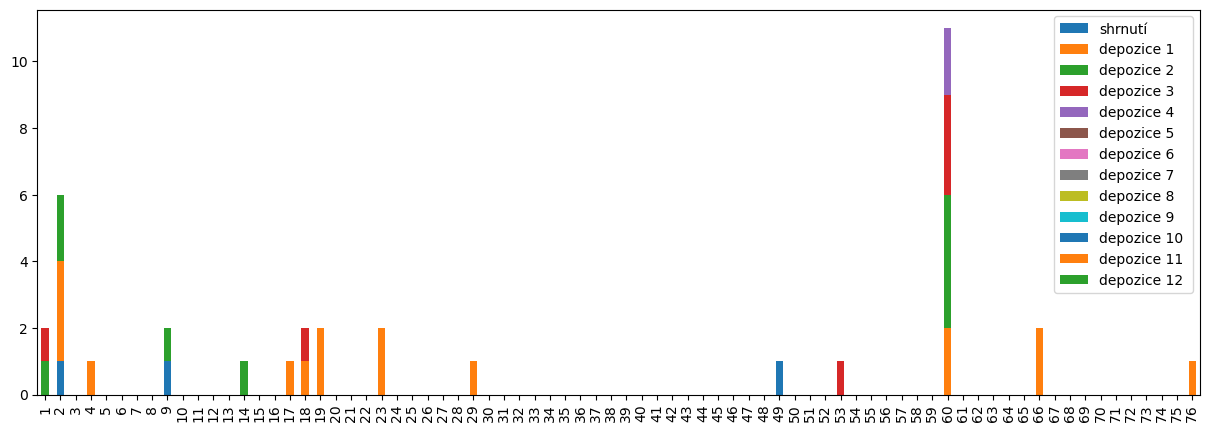

In [2]:
import os.path as pth
import pandas as pd
import re

index = []
counts = []
total = []
total.append(0)

pers_max = 76
depos_max = 12

dir = '/home/jovyan/work/'
pattern = "blessed.{0,70} bread | bread.{0,70} blessed"

for pers in range(1, pers_max + 1):
    index.append(pers);
    total.append(pers);
    total[pers] = 0

for depos in range(0, depos_max + 1):
    counts.append([])
    for pers in range(1, pers_max + 1):
        name = dir + "/depos-final/" + str("{:02d}".format(pers)) + "-" + str("{:02d}".format(depos)) + ".txt"        
        if (pth.isfile(name)):
            file = open(name, "rt")
            text = file.read().lower()
            result = re.finditer(pattern, text)
            indices = [m.start(0) for m in result]
            counts[depos].append(len(indices))
        else:
            counts[depos].append(0)
                       
df = pd.DataFrame({'shrnutí': counts[0],
                   'depozice 1 ': counts[1],
                   'depozice 2 ': counts[2],
                   'depozice 3 ': counts[3],
                   'depozice 4 ': counts[4],
                   'depozice 5 ': counts[5],
                   'depozice 6 ': counts[6],
                   'depozice 7 ': counts[7],
                   'depozice 8 ': counts[8],
                   'depozice 9 ': counts[9],
                   'depozice 10 ': counts[10],
                   'depozice 11 ': counts[11],
                   'depozice 12 ': counts[12],
                  }, index = index)

for depos in range(0, depos_max + 1): 
    for pers in range(0, pers_max):
        total[pers] += counts[depos][pers]
        
total.pop()
print(total)
dfx = pd.DataFrame(total)
dfx.to_excel('temp.xls', engine='openpyxl', index=False)

#print(df)
df.plot.bar(stacked=True, figsize=(15, 5))
df.describe()